## Basic Data Exploration

In [157]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

# Notebook requirement

%matplotlib inline

import seaborn as sns

In [158]:
data = pd.read_csv('SSM_Data_Exercise.csv')

In [159]:
data.head()

,Date (Ticket Created),Day of Week (Mon-Sun) (Ticket Created),# Tickets Created,First Reply Time [Avg] [Hrs]
0,08/09/2016,Tuesday,124,7.882615
1,08/07/2016,Sunday,92,13.736742
2,08/01/2016,Monday,140,8.495217
3,08/05/2016,Friday,217,10.047561
4,09/20/2016,Tuesday,144,7.678954


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
Date (Ticket Created)                     92 non-null object
Day of Week (Mon-Sun) (Ticket Created)    92 non-null object
# Tickets Created                         92 non-null int64
First Reply Time [Avg] [Hrs]              92 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ KB


In [161]:
# Simplify columns names

new_columns = ['date', 'weekday', 'tickets_created', 'first_reply']

data.columns = new_columns

# Creating new features

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].apply(lambda x: x.year)
data['month'] = data['date'].apply(lambda x: x.month)
data['day_month'] = data['date'].apply(lambda x: x.day)

data.head(10)

,date,weekday,tickets_created,first_reply,year,month,day_month
0,2016-08-09,Tuesday,124,7.882615,2016,8,9
1,2016-08-07,Sunday,92,13.736742,2016,8,7
2,2016-08-01,Monday,140,8.495217,2016,8,1
3,2016-08-05,Friday,217,10.047561,2016,8,5
4,2016-09-20,Tuesday,144,7.678954,2016,9,20
5,2016-07-15,Friday,122,5.750435,2016,7,15
6,2016-07-28,Thursday,89,4.482068,2016,7,28
7,2016-09-26,Monday,154,7.140025,2016,9,26
8,2016-07-13,Wednesday,132,14.599174,2016,7,13
9,2016-08-29,Monday,163,7.617974,2016,8,29


In [85]:
data.describe()

,tickets_created,first_reply,year,month,day_month
count,92.000000,92.000000,92.0,92.000000,92.000000
mean,130.641304,10.537427,2016.0,7.989130,15.836957
std,46.355668,5.552619,0.0,0.818664,8.902743
min,63.000000,3.262222,2016.0,7.000000,1.000000
25%,101.000000,7.440018,2016.0,7.000000,8.000000
50%,123.500000,9.311665,2016.0,8.000000,16.000000
75%,145.250000,11.742269,2016.0,9.000000,23.250000
max,359.000000,39.410714,2016.0,9.000000,31.000000


### 1 - Visualize your data

Text(0,0.5,'Tickets created')

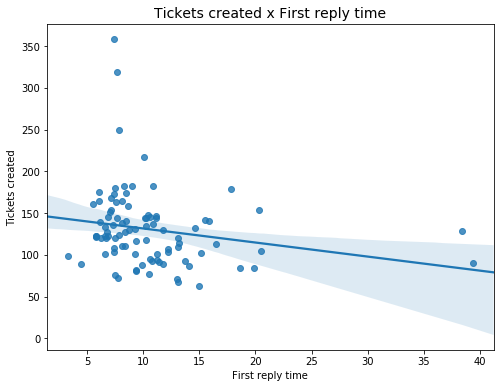

In [86]:
plt.figure(figsize=(8, 6))
plt.title('Tickets created x First reply time', fontsize=14)
sns.regplot(data['first_reply'], data['tickets_created'])
plt.xlabel('First reply time')
plt.ylabel('Tickets created')

In [87]:
data[['first_reply', 'tickets_created']].corr()

,first_reply,tickets_created
first_reply,1.000000,-0.201606
tickets_created,-0.201606,1.000000


In [88]:
# Visualizing the outliers detected by manually checking the scatter plot 
# (instead of using an outlier detection method like Tukey's)

outliers = data[(data['tickets_created'] > 300) | (data['first_reply'] > 35)].index
data.loc[outliers]

,date,weekday,tickets_created,first_reply,year,month,day_month
17,2016-07-05,Tuesday,359,7.442776,2016,7,5
28,2016-07-09,Saturday,129,38.433478,2016,7,9
50,2016-07-06,Wednesday,319,7.690226,2016,7,6
64,2016-07-02,Saturday,90,39.410714,2016,7,2


In [89]:
data.drop(outliers, inplace=True)

Text(0,0.5,'Tickets created')

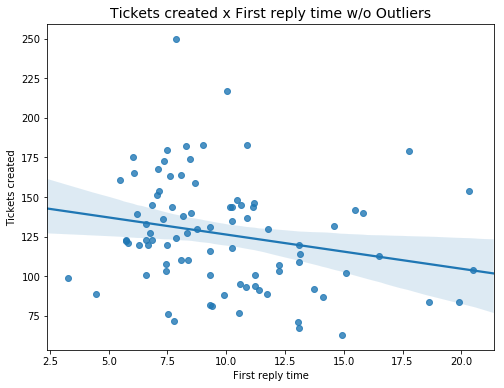

In [92]:
plt.figure(figsize=(8, 6))
plt.title('Tickets created x First reply time w/o Outliers', fontsize=14)
sns.regplot(data['first_reply'], data['tickets_created'])
plt.xlabel('First reply time')
plt.ylabel('Tickets created')

In [93]:
data[['tickets_created', 'first_reply']].corr(method='pearson')

,tickets_created,first_reply
tickets_created,1.000000,-0.226018
first_reply,-0.226018,1.000000


### 2 - Observation on data visualization

As we can see from the plots, the linear regression fit in the data shows there is a weak negative correlation between First Reply Time and Tickets created. In fact, it's confirmed by the .corr() method, showing a -.22 pearson coefficient. We can also see that in the full dataset, there are 4 outliers that we removed manually.

### 3 - More visualizations

From the scatter plot between first time reply and tickets created, we can see a negative correlation. It means that the more tickets are created, the faster the team adresses them. So we can conclude that, average first reply time decreases when more tickets are created.

### 4 - Other conclusions

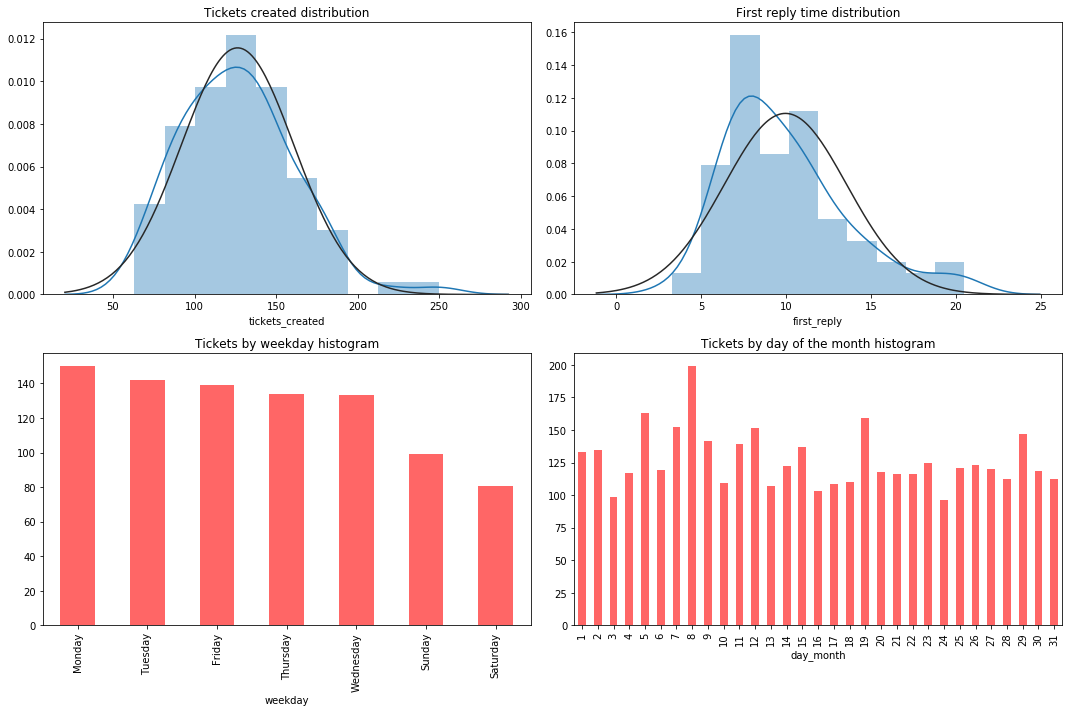

In [137]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(data['tickets_created'], fit=norm, ax=ax[0,0])
ax[0, 0].set_title('Tickets created distribution')
sns.distplot(data['first_reply'], fit=norm, ax=ax[0,1])
ax[0, 1].set_title('First reply time distribution')
data.groupby('weekday')['tickets_created'].mean().sort_values(ascending=False).plot(kind='bar', ax=ax[1, 0], color='r', alpha=.6)
ax[1, 0].set_title('Tickets by weekday histogram')
data.groupby('day_month')['tickets_created'].mean().plot(kind='bar', ax=ax[1, 1], color='r', alpha=.6)
ax[1, 1].set_title('Tickets by day of the month histogram')
plt.tight_layout()

Text(0.5,0,'\nDay of the month')

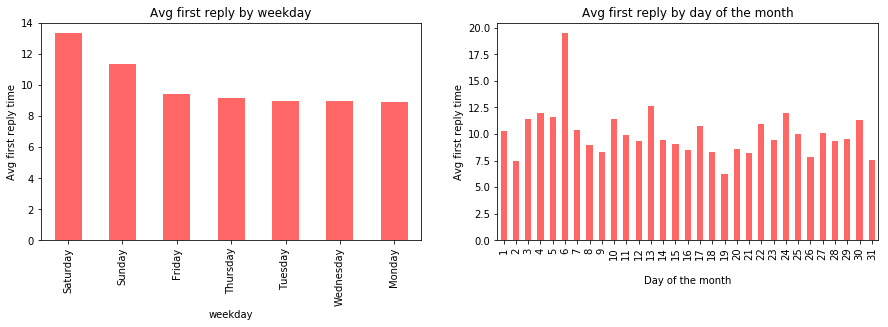

In [154]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))

data.groupby('weekday')['first_reply'].mean().sort_values(ascending=False).plot(kind='bar', ax=ax[0], color='r', alpha=.6)
ax[0].set_title('Avg first reply by weekday')
ax[0].set_ylabel('Avg first reply time')
data.groupby('day_month')['first_reply'].mean().plot(kind='bar', ax=ax[1], color='r', alpha=.6)
ax[1].set_title('Avg first reply by day of the month')
ax[1].set_ylabel('Avg first reply time')
ax[1].set_xlabel('\nDay of the month')

From these plots we can conclude that:

 - The tickets created distribution is very close to a normal distribution.
 - Monday is the day with the most tickets created average.
 - Saturday is the day with the least tickets created average.
 - There is no clear relationship between the day of the month and the number of tickets created/first reply time.
 - Saturday is the day with the highest average first reply time.
 - Monday is the day with the lowest average first reply time.
 
It's interesting to see there is almost a perfect inverse correlation between the first reply time and tickets created when looking at the days of the week. Saturday is the day where it takes the longest to respond to tickets, even though it has the least amount of tickets created. The same goes for mondays, it's the day with fastest reponses, but with the highest count of tickets created.

### How to reduce first time reply

In [166]:
print('Average first reply time:', round(data['first_reply'].mean(), 2))

Average first reply time: 10.54


Our goal is to decrease the average reply time to 5 hours, that's more then 50%. Really ambitious, but I think we can start by paying special attention to what's going on weekends. Why is the response time longer on weekends when the amount of tickets created is lower? Is that because we have less people working on weekeds? And why is that, as the week goes by, first reply time decreases?

To make a better analysis, it would be ideal to have the amount of people working on replies.